Make table with defense and offensive points per team per season
- General tactic: find a set of features to investigate (ie a feature vector)
- do a random forest analysis to see which one is best


In [157]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

compact_result_season = pd.read_csv('./data/DataFiles/RegularSeasonCompactResults.csv')

#import the file with team IDs
team_ids = pd.read_csv('./data/DataFiles/Teams.csv')

Merge Team IDs and Team Names

In [158]:
named_test = pd.merge(compact_result_season, team_ids[['TeamID', 'TeamName']], left_on='WTeamID', right_on='TeamID')

In [159]:
named_test.columns = [u'Season', u'DayNum', u'WTeamID', u'WScore', u'LTeamID', u'LScore',
       u'WLoc', u'NumOT', u'TeamID', u'WTeamName']

named_test = named_test.drop('TeamID', axis=1)

named_test = pd.merge(named_test, team_ids[['TeamID', 'TeamName']], left_on='LTeamID', right_on='TeamID')

named_test.columns = [   u'Season',    u'DayNum',   u'WTeamID',    u'WScore',   u'LTeamID',
          u'LScore',      u'WLoc',     u'NumOT', u'WTeamName',
          u'TeamID',  u'LTeamName']

In [160]:
named_test.drop('TeamID', axis=1, inplace=True)

In [161]:
named_test.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName
0,1985,20,1228,81,1328,64,N,0,Illinois,Oklahoma
1,1985,33,1228,73,1328,70,H,0,Illinois,Oklahoma
2,1990,82,1112,78,1328,74,H,0,Arizona,Oklahoma
3,2011,34,1112,83,1328,60,H,0,Arizona,Oklahoma
4,1985,118,1242,82,1328,76,H,0,Kansas,Oklahoma


In [162]:
named_test = named_test.sort_values(['WTeamID']).reset_index()

In [163]:
named_test.drop('index', axis=1, inplace=True)

In [164]:
named_test.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName
0,2015,49,1101,65,1354,59,N,0,Abilene Chr,S Carolina St
1,2016,25,1101,72,1197,62,N,0,Abilene Chr,Florida A&M
2,2014,94,1101,87,1223,81,H,0,Abilene Chr,Houston Bap
3,2015,120,1101,83,1223,71,H,0,Abilene Chr,Houston Bap
4,2016,92,1101,79,1223,72,H,0,Abilene Chr,Houston Bap


In [165]:
maryland_wins = named_test[named_test['WTeamID'] ==1268]

In [166]:
maryland_wins_2016 = maryland_wins[maryland_wins['Season'] == 2016]

In [167]:
umd_2016_ppg = maryland_wins_2016['WScore'].mean()
umd_2016_ppga = maryland_wins_2016['LScore'].mean()

In [168]:
maryland_loss = named_test[named_test['LTeamID'] ==1268]
maryland_loss_2016 = maryland_loss[maryland_loss['Season'] == 2016]

In [169]:
umd_2016_ppg = (maryland_wins_2016['WScore'].mean()*len(maryland_wins_2016) + maryland_loss_2016['LScore'].mean()*len(maryland_loss_2016))/(len(maryland_loss_2016)+len(maryland_wins_2016))
umd_2016_ppga = (maryland_wins_2016['LScore'].mean()*len(maryland_wins_2016) + maryland_loss_2016['WScore'].mean()*len(maryland_loss_2016))/(len(maryland_loss_2016)+len(maryland_wins_2016))

In [170]:
#Process for creating table of interest
# 1 - Loop through WTeamIDS
# 2 - Loop through Seasons
# 3 -  Calculate PPG and PPGA
# 4 - Store in 'master - list'

master_list = []
header = ['TeamID', 'Team Name', 'Season', 'Number Wins', 'Number Losses', 'PPG', 'PPGA']
#master_list.append(header)

#find unique TeamIDS
unique_team_id = team_ids['TeamID'].unique()
unique_season = named_test['Season'].unique()
unique_season.sort()

#loop through TeamIDS
for ids in unique_team_id:
    win_team = named_test[named_test['WTeamID']==ids]
    loss_team = named_test[named_test['LTeamID']==ids]
    
    team_name = win_team['WTeamName'].iloc[0]
    
    for seas in unique_season:
        win_team_seas = win_team[win_team['Season']==seas]
        loss_team_seas = loss_team[loss_team['Season']==seas]
        
        len_win = len(win_team_seas)
        len_loss = len(loss_team_seas)
        
        if (len_win + len_loss) != 0:
        
            ppg_seas = (win_team_seas['WScore'].mean()*len_win + loss_team_seas['LScore'].mean()*len_loss)/(len_win+len_loss) 
            ppga_seas = (win_team_seas['LScore'].mean()*len_win + loss_team_seas['WScore'].mean()*len_loss)/(len_win+len_loss) 

        else:
            
            ppg_seas = 0.0
            ppga_seas = 0.0
                
        #storage tuple
        stor = [ids, team_name, seas, len_win, len_loss, ppg_seas, ppga_seas]
        master_list.append(stor)
    
    
        
        
        

        
    
                      

In [171]:
df1 = pd.DataFrame(master_list, columns = header)

In [172]:
duke = df1[df1['Team Name'] == 'Duke']

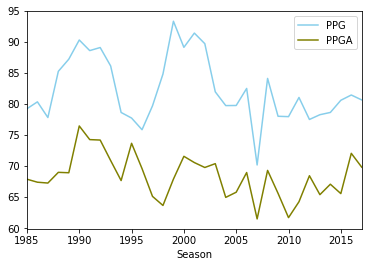

In [173]:
duke.plot(x ='Season', y = ['PPG', 'PPGA'], color = ['skyblue', 'olive'])



In [174]:
duke.head()

,TeamID,Team Name,Season,Number Wins,Number Losses,PPG,PPGA
2640,1181,Duke,1985,22,7,79.241379,67.896552
2641,1181,Duke,1986,32,2,80.352941,67.411765
2642,1181,Duke,1987,21,8,77.827586,67.275862
2643,1181,Duke,1988,24,6,85.266667,69.000000
2644,1181,Duke,1989,24,7,87.225806,68.935484
